In [1]:
# convert a word to lower-case and remove all punctuation
def strip_word( w ):
    w = w.lower()
    w = ''.join([i for i in w if i.isalpha()])
    return( w )

# sort dictionary from most to least frequent entry count
def sort_dictionary( D ):
    Ds = sorted(D.items(), key=lambda x:x[1], reverse=True)               
    return Ds

In [2]:
import os
directory=r'/Users/xiedan/Documents/Berkeley/2020Fall/INFO206/B/assignment5/data'#set the directory

def build_dictionary(prefix):
    my_dictionary = {} #create the dictionary
    N=0 #count word starting at 0
    for file in os.listdir(directory):
        if file.startswith(prefix) and file.endswith(".txt"): #open the right file
            myfile = open(file, "r",encoding="ISO-8859-1")
            for line in myfile:
                line=line.split() #split the line
                N=N+len(line) #increase the number of total words by number of words in this line
                for word in line:
                    word=strip_word(word) #strip each word
                    if len(word)!=0:
                        if word in my_dictionary: 
                            my_dictionary[word] +=1 #increase the count for this word if it is in the dictionary
                        else:
                            my_dictionary[word] = 1 #set the count for this word to 1 if it hasn't shown before
                        
    for key in my_dictionary: #change count to percentage
        my_dictionary[key]=my_dictionary[key]/N*100
    
    myfile.close()
    return my_dictionary

def print_dictionary(Dic): #print the dictionary
    for key in Dic:
        print(key,Dic[key])

In [3]:
all_items=sort_dictionary(build_dictionary("")) 
first_25=all_items[0:25] #extract the top 25 most frequent words
first_25_word=[]
for key in first_25:
    percent=key[0]
    first_25_word.append(percent)
first_25_word

['the',
 'to',
 'of',
 'and',
 'a',
 'in',
 'that',
 'is',
 'for',
 'on',
 'it',
 'as',
 'was',
 'but',
 'i',
 'with',
 'at',
 'this',
 'be',
 'not',
 'has',
 'have',
 'are',
 'my',
 'an']

In [4]:
# create a list of files in pk and dr group
pk = ["pk1.txt","pk2.txt","pk3.txt","pk4.txt","pk5.txt","pk6.txt","pk7.txt","pk8.txt","pk9.txt"]
dr = ["dr1.txt","dr2.txt","dr3.txt","dr4.txt","dr5.txt","dr6.txt","dr7.txt","dr8.txt","dr9.txt"]

In [15]:
 # build a 2-D numpy matrix F1 of size 9 x 25 for pk
    
F1=[]
for a in pk:
    pkdic=build_dictionary(a)          
    for i in first_25_word:
        if i not in pkdic:
            pkdic[i]=0       # set the frequency count to 0 if the word is not present in a document's dictionary
    pklist=[]
    for i in first_25_word:
        if i in pkdic:
            pklist.append(pkdic[i])     # extract the frequency count of other most frequent words 

    F1.append(pklist)

In [16]:
 # build a 2-D numpy matrix F1 of size 9 x 25 for dr
F2=[]
drlist=[]
for b in dr:
    drdic=build_dictionary(b)          
    for i in first_25_word:
        if i not in drdic:
            drdic[i]=0       # set the frequency count to 0 if the word is not present in a document's dictionary     
    drlist=[]    
    for i in first_25_word:
        if i in drdic:
            drlist.append(drdic[i])     # extract the frequency count of other most frequent words 

    F2.append(drlist)

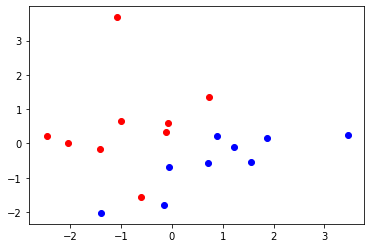

In [17]:
# Dimensionality reduction and visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

F   = np.concatenate((F1,F2),axis=0)
pca = PCA(n_components=2)
Fp  = pca.fit(F).transform(F)
plt.scatter( Fp[0:9,0], Fp[0:9,1], color='b')
plt.scatter( Fp[9:18,0], Fp[9:18,1], color='r' )